# A/B Testing for Player Retention: Gatekeepers of Engagement

### Introduction: The Gate to Glory (or Doom?)

_In the cutthroat world of mobile gaming, player retention is the holy grail. Will a simple gate change (level 30 to level 40) unlock the secrets to everlasting player loyalty?_

This A/B test aims to answer that question by comparing two groups:

*   **gate_30:**  Players who encounter the gate at level 30.
*   **gate_40:** Players who encounter the gate at level 40.

Our trusty metrics will be:

*   **1-day retention:**  The percentage of players returning after 24 hours.
*   **7-day retention:** The percentage sticking around for a full week.

### Hypothesis Showdown:

*   **Null Hypothesis (H0):**  Gate placement has no effect on player retention.  It's all just a random roll of the dice.
*   **Alternative Hypothesis (H1):**  Moving the gate to level 40 will significantly impact player retention (for better or worse!). 


In [1]:
import data_utils as f

In [2]:
df = f.pd.read_csv('data/cookie_cats.csv')

In [3]:
f.check_df(df)

############## Shape ##############
(90189, 5)
############## Types ##############
userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object
############## Head ##############
   userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3        False        False
1     337  gate_30              38         True        False
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True
############## Tail ##############
        userid  version  sum_gamerounds  retention_1  retention_7
90184  9999441  gate_40              97         True        False
90185  9999479  gate_40              30        False        False
90186  9999710  gate_30              28         True        False
90187  9999768  gate_40              51         True        False
90188  99998

### Data Exploration: Unmasking the Playerbase 

_Let's take a peek under the hood of our data to understand the players we're dealing with._

*   **Dataset Overview:** lets overlook gate_30 and gate_40 by sum_gamerounds
*   **Initial Visualizations:**  first lets check a boxplot
*   **Outlier Removal:**  I can see there is a lot of outliers in both categories

In [4]:
mask_a = (((df["version"] == "gate_30") & (df["sum_gamerounds"] < 30)) |
          ((df["version"] == "gate_40") & (df["sum_gamerounds"] < 40)))
mask_b = df['sum_gamerounds'] != 0
mask_c = df['sum_gamerounds'] < 10000

df_filtered = df[~mask_a & mask_b & mask_c]

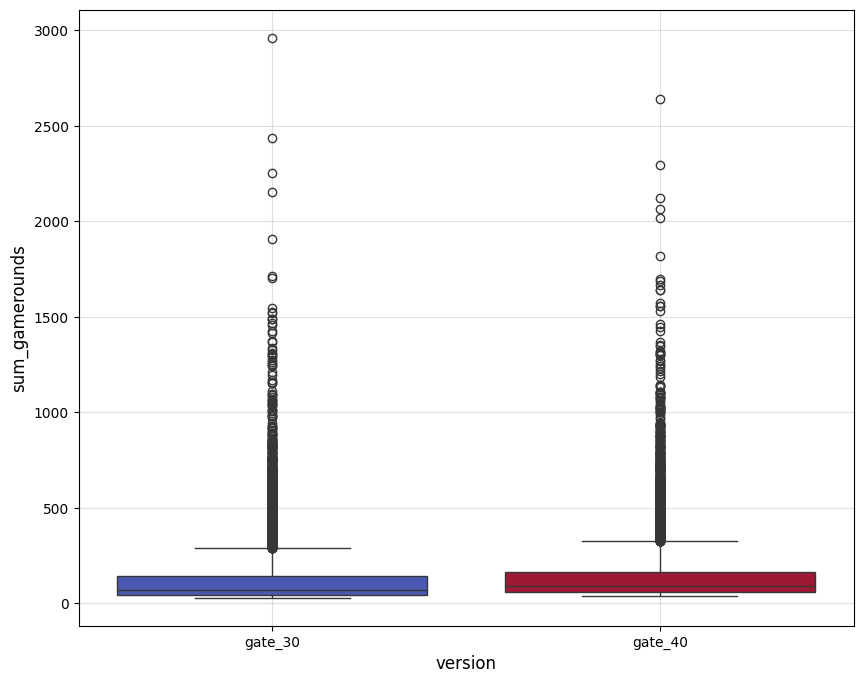

In [5]:
f.boxplot_group(df_filtered, group_column = 'version',
    value_column = 'sum_gamerounds')

In [6]:
df_retention = df_filtered[["retention_1", "retention_7"]].mean() * 100
print(f"1-day retention ratio: {round(df_retention.iloc[0], 2)}%"
      f"\n7-days retention ratio: {round(df_retention.iloc[1], 2)}%")

1-day retention ratio: 81.43%
7-days retention ratio: 45.97%



Group column 'version' statistics:

| version   | Count      | Unique_Values   | Ratio   | Total_Count   |
|:----------|:-----------|:----------------|:--------|:--------------|
| gate_30   | 16655.0000 | 16655.0000      | 0.5464  | 30482.0000    |
| gate_40   | 13827.0000 | 13827.0000      | 0.4536  | 30482.0000    |


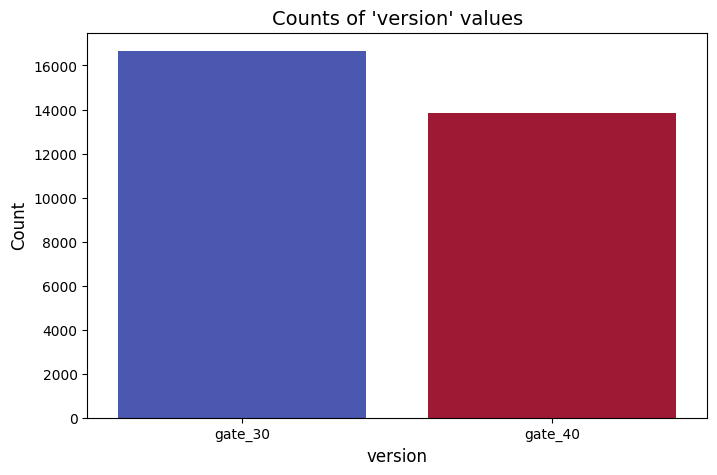

In [7]:
f.analyze_categorical_variable(df_filtered, group_column = 'version',
    value_column = 'userid')

In [8]:
df_retention_1d = df[(df['retention_1'] == True) &
                     (df['retention_7'] == False)]
df_retention_7d = df[(df['retention_1'] == False) &
                     (df['retention_7'] == True)]


Group column 'version' statistics:

| version   | Count      | Unique_Values   | Ratio   | Total_Count   |
|:----------|:-----------|:----------------|:--------|:--------------|
| gate_30   | 13358.0000 | 13358.0000      | 0.4953  | 26971.0000    |
| gate_40   | 13613.0000 | 13613.0000      | 0.5047  | 26971.0000    |


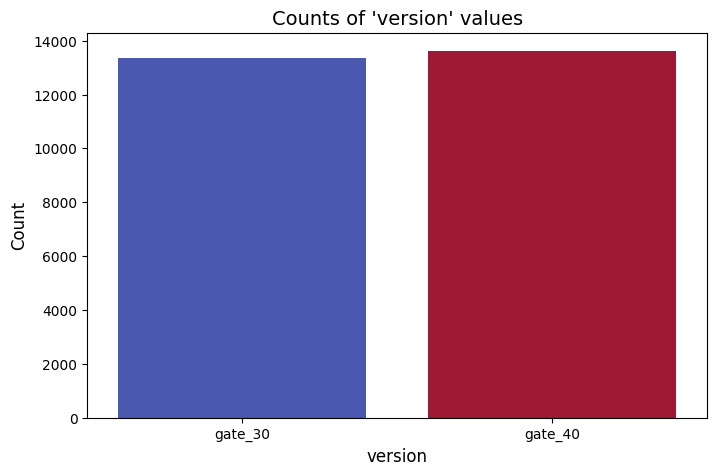

In [9]:
f.analyze_categorical_variable(
    df_retention_1d,
    group_column = 'version',
    value_column = 'userid')


Group column 'version' statistics:

| version   | Count     | Unique_Values   | Ratio   | Total_Count   |
|:----------|:----------|:----------------|:--------|:--------------|
| gate_30   | 1826.0000 | 1826.0000       | 0.5074  | 3599.0000     |
| gate_40   | 1773.0000 | 1773.0000       | 0.4926  | 3599.0000     |


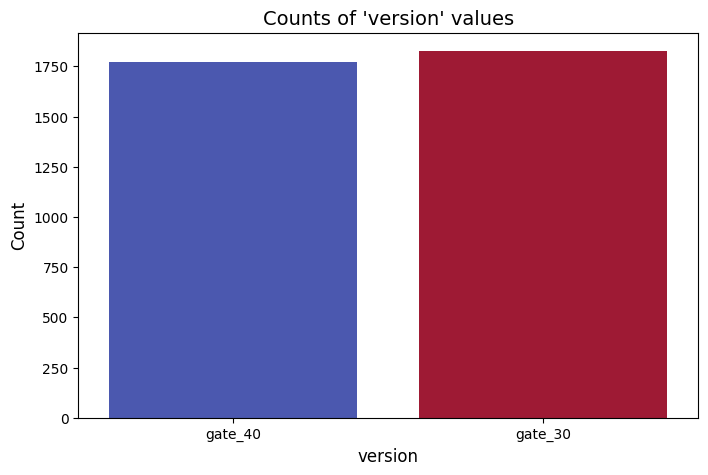

In [10]:
f.analyze_categorical_variable(
    df_retention_7d,
    group_column = 'version',
    value_column = 'userid')

In [11]:
sample_retention_1d_df = f.chi_squared_test_with_sampling(
    df_retention_1d,
    group_column = 'version',
    count_column = 'sum_gamerounds')

H0 hypothesis rejected: Not equal distribution between groups.
Chi-squared Statistic: 83.4369, P-value: 0.0000


In [12]:
sample_retention_7d_df = f.chi_squared_test_with_sampling(
    df_retention_7d,
    group_column = 'version',
    count_column = 'sum_gamerounds')

H0 hypothesis rejected: Not equal distribution between groups.
Chi-squared Statistic: 20.8715, P-value: 0.0000


In [13]:
f.shapiro_test(sample_retention_1d_df, group_column = 'version',
    value_column = 'sum_gamerounds')
f.shapiro_test(sample_retention_7d_df, group_column = 'version',
    value_column = 'sum_gamerounds')


Shapiro-Wilk Test Results:
-------------------------------------------------------
Promotion gate_30: W = 0.696, p-value = 0.0000000000
 H0 hypothesis rejected: Promotion gate_30 is likely not normal.

Promotion gate_40: W = 0.708, p-value = 0.0000000000
 H0 hypothesis rejected: Promotion gate_40 is likely not normal.


Shapiro-Wilk Test Results:
-------------------------------------------------------
Promotion gate_30: W = 0.657, p-value = 0.0000000000
 H0 hypothesis rejected: Promotion gate_30 is likely not normal.

Promotion gate_40: W = 0.700, p-value = 0.0000000000
 H0 hypothesis rejected: Promotion gate_40 is likely not normal.




'Sum_gamerounds' QQ-Plot with 1 day retention: 


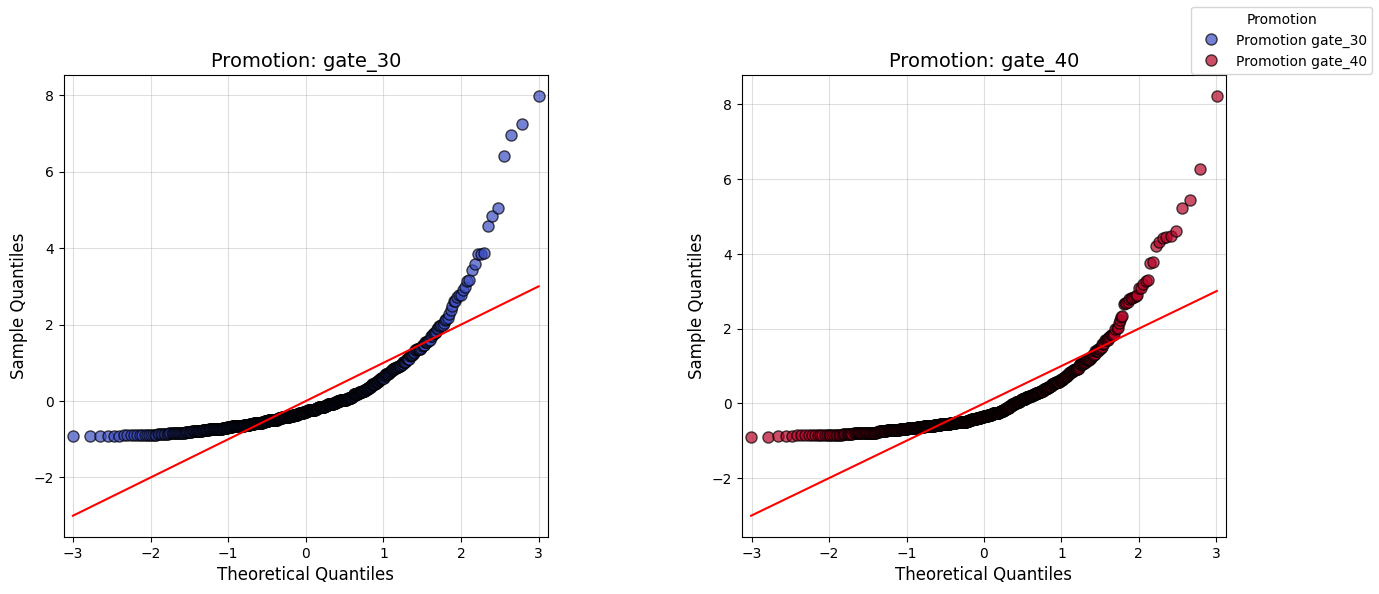


'Sum_gamerounds' QQ-Plot with 7 day retention: 


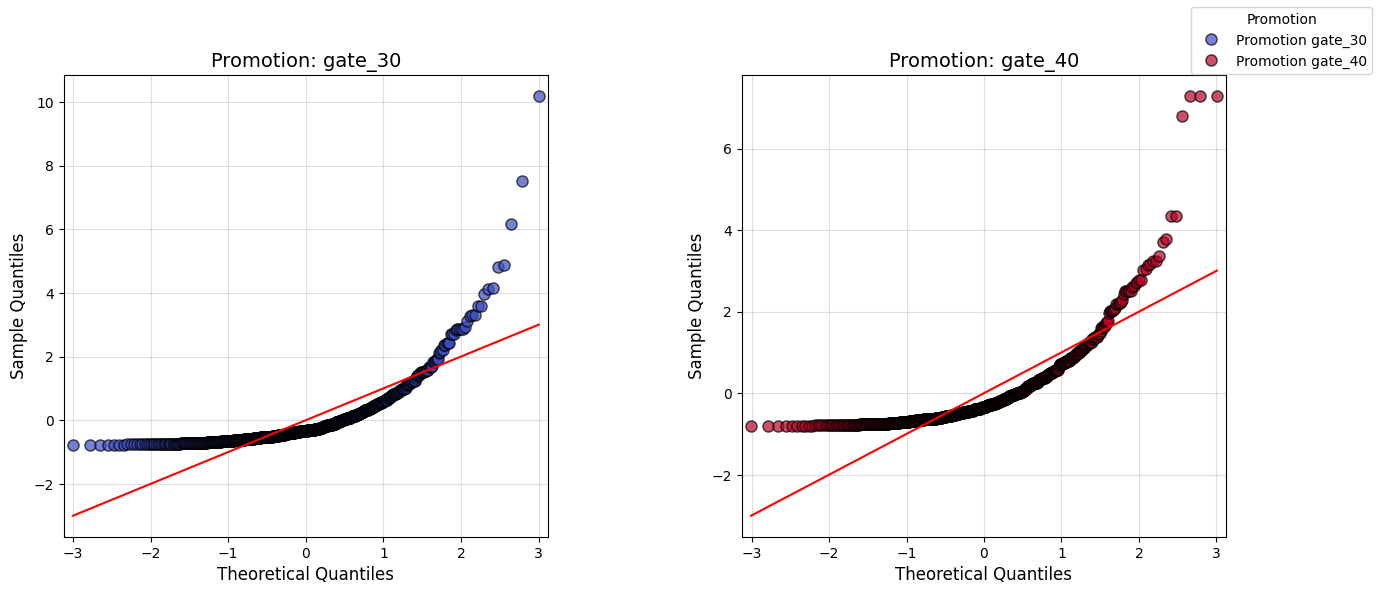

In [14]:
print(f'\n\'Sum_gamerounds\' QQ-Plot with 1 day retention: ')
f.qq_plot_all(sample_retention_1d_df,
    group_col = 'version',
    value_col = 'sum_gamerounds')
print(f'\n\'Sum_gamerounds\' QQ-Plot with 7 day retention: ')
f.qq_plot_all(sample_retention_7d_df,
    group_col = 'version',
    value_col = 'sum_gamerounds')

_It looks like from this sample is not a normal distribution since both the QQ plot and Shapiro-Wilkes test are guiding us to a non parametric approach again._


'Sum_gamerounds' distribution with 1 day retention: 


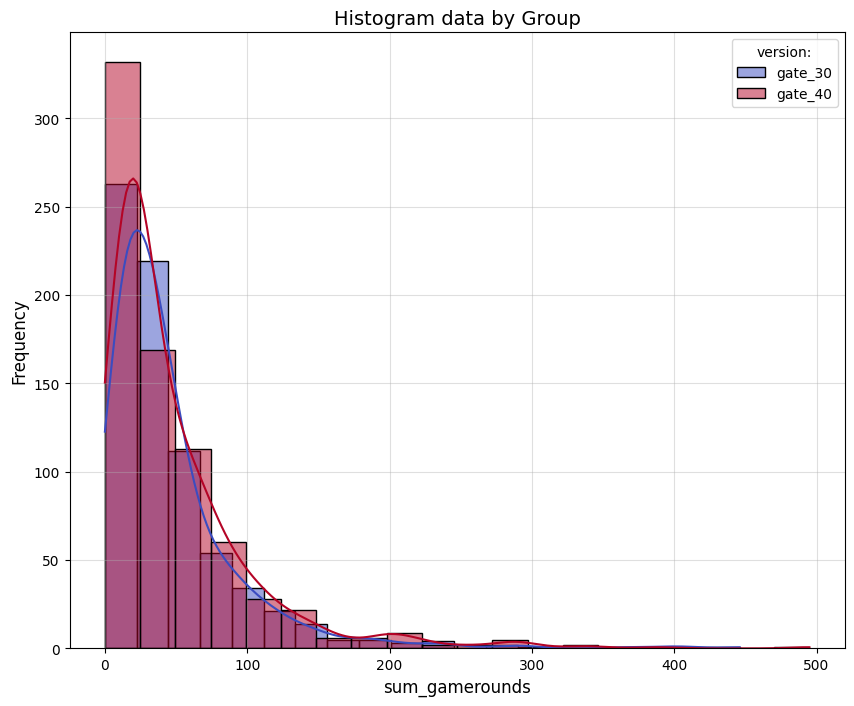


'Sum_gamerounds' distribution with 7 day retention: 


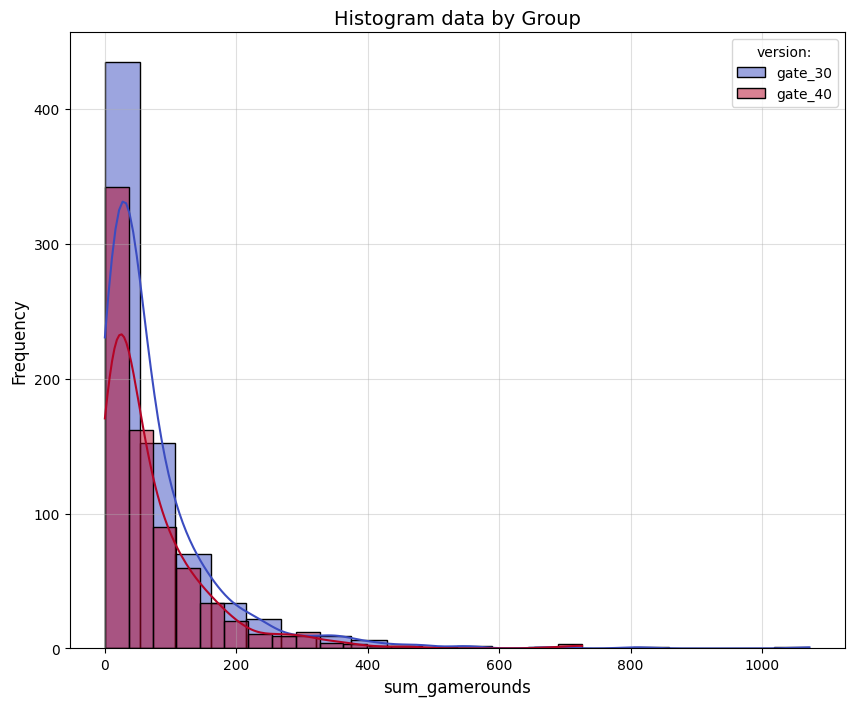

In [15]:
print(f'\n\'Sum_gamerounds\' distribution with 1 day retention: ')
f.histogram_group(sample_retention_1d_df,
    group_column = 'version',
    value_column = 'sum_gamerounds', )
print(f'\n\'Sum_gamerounds\' distribution with 7 day retention: ')
f.histogram_group(sample_retention_7d_df, group_column = 'version',
    value_column = 'sum_gamerounds')

In [16]:
mean_gamerounds_1d = (df_retention_1d.groupby('version')['sum_gamerounds']
                      .mean())
mean_gamerounds_7d = (df_retention_7d.groupby('version')['sum_gamerounds']
                      .mean())
print(f'\nAverage game rounds with 1 day retention: '
      f'\n{mean_gamerounds_1d.to_markdown(numalign = "left", stralign = "left")}')
print(f'\nAverage game rounds with 7 day retention: '
      f'\n{mean_gamerounds_7d.to_markdown(numalign = "left", stralign = 
      "left")}')


Average game rounds with 1 day retention: 
| version   | sum_gamerounds   |
|:----------|:-----------------|
| gate_30   | 49.6945          |
| gate_40   | 50.0255          |

Average game rounds with 7 day retention: 
| version   | sum_gamerounds   |
|:----------|:-----------------|
| gate_30   | 100.432          |
| gate_40   | 75.2611          |


In [17]:
print(f'\n1 day retention Kruskal-Wallis test:')
f.kruskal_test(df_retention_1d,
    group_col = 'version',
    value_col = 'sum_gamerounds')
print(f'\n7 day retention Kruskal-Wallis test:')
f.kruskal_test(df_retention_7d,
    group_col = 'version',
    value_col = 'sum_gamerounds')


1 day retention Kruskal-Wallis test:

Kruskal-Wallis Test Results:
-------------------------------------------------------
H-statistic: 0.2661, p-value: 0.6060
H0 hypothesis accepted: No significant differences between groups.

7 day retention Kruskal-Wallis test:

Kruskal-Wallis Test Results:
-------------------------------------------------------
H-statistic: 0.6333, p-value: 0.4261
H0 hypothesis accepted: No significant differences between groups.


### Statistical Showdown Results: A Gatekeeper's Dilemma

Our Kruskal-Wallis test has concluded, and the results are in:

* **No Statistical Difference:** We failed to reject the null hypothesis. This means there's no evidence to suggest that changing the gate from level 30 to 40 had a statistically significant impact on the number of game rounds played.

_Alas, it seems our gate change didn't pack the punch we hoped for. It's time to explore other factors that might influence player retention!_

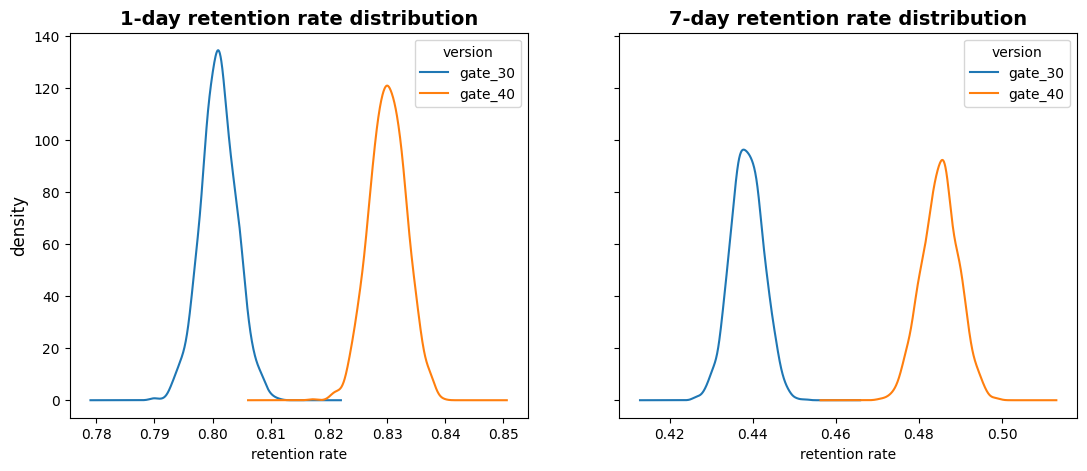

1-day retention Bootstrapping confidence intervals: {'gate_30': array([0.79469225, 0.80719457]), 'gate_40': array([0.82395766, 0.83613086])}
7-day retention Bootstrapping confidence intervals: {'gate_30': array([0.4307498 , 0.44596452]), 'gate_40': array([0.47643239, 0.49375377])}


In [18]:
ci_1b, ci_7b = f.bootstrap_retention_rates(df_filtered)
print(f'1-day retention Bootstrapping confidence intervals: {ci_1b}')
print(f'7-day retention Bootstrapping confidence intervals: {ci_7b}')

In [19]:
ci_1a, ci_7a = f.analytical_retention_cis(df_filtered)
print(f'1-day retention analytical confidence intervals: {ci_1a}')
print(f'7-day retention analytical confidence intervals: {ci_7a}')

1-day retention analytical confidence intervals: {'gate_30': (0.7949575188902305, 0.8070839101100697), 'gate_40': (0.8239290025236327, 0.8364456268247437)}
7-day retention analytical confidence intervals: {'gate_30': (0.43119077665147487, 0.44626344130109197), 'gate_40': (0.47673515827469143, 0.4933957450304362)}


### Retention Analysis: To Boot(strap) or Not to Boot(strap)?

The jury (aka confidence intervals) is in on our gate-change experiment! Here's the lowdown:

*   **Bootstrapping vs. Analytical:** Both methods delivered similar confidence intervals (CIs) for 1-day and 7-day retention. It seems the normal approximation wasn't too far off the mark.
*   **No Clear Winner (Yet):** While gate_30 appears *slightly* ahead in retention for both timeframes, these differences aren't substantial enough to declare victory. 
*   **CI Caution:** Remember, these intervals represent a *range* of likely values for the true retention rates, not precise figures.  

_Next Steps: We'll need to bring out the big statistical guns (hypothesis testing) to determine if these differences are statistically significant.  Maybe then we'll finally know if moving that gate was a genius move or just a level change._

### Future Directions:

*   **Increase Sample Size:** Gather more data to increase the power of our statistical tests.
*   **Segment the Players:** Analyze retention rates for different player segments (e.g., by country, age, or spending habits).
*   **Explore Other Metrics:** Consider additional metrics that might reveal subtle differences between the groups (e.g., time spent per session, in-app purchases).